In [38]:
import pandas as pd
import nltk

import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

df = pd.read_csv('Sentiment_Analysis_Ryanair_Reviews.csv')

df.head()

,Number,Rating,Review
0,1,Bad,Not on time. Not to destination or back home. ...
1,2,Bad,Checkin If you are trying to verify your booki...
2,3,Bad,Terrible delays. Stealing people's time. 2 hou...
3,4,Bad,The staff members were friendly and there was ...
4,5,Bad,I took a flight from Italy to Romania and they...


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Number  600 non-null    int64 
 1   Rating  600 non-null    object
 2   Review  600 non-null    object
dtypes: int64(1), object(2)
memory usage: 14.2+ KB


In [40]:
df.groupby('Rating').describe()

Number                                                       
         count   mean        std    min     25%    50%     75%    max
Rating                                                               
Bad      200.0  100.5  57.879185    1.0   50.75  100.5  150.25  200.0
Good     200.0  300.5  57.879185  201.0  250.75  300.5  350.25  400.0
Neutral  200.0  500.5  57.879185  401.0  450.75  500.5  550.25  600.0

In [41]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Rating'] = label_encoder.fit_transform(df['Rating'])

In [42]:
df.groupby('Rating').describe()

Number                                                       
        count   mean        std    min     25%    50%     75%    max
Rating                                                              
0       200.0  100.5  57.879185    1.0   50.75  100.5  150.25  200.0
1       200.0  300.5  57.879185  201.0  250.75  300.5  350.25  400.0
2       200.0  500.5  57.879185  401.0  450.75  500.5  550.25  600.0

In [52]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(1,2), stop_words='english')
x = vectorizer.fit_transform(df['Review'])
y = df['Rating']

In [53]:
print(x)

  (0, 16533)	1
  (0, 4678)	1
  (0, 8084)	1
  (0, 12270)	1
  (0, 7063)	1
  (0, 11347)	1
  (0, 7299)	1
  (0, 8055)	1
  (0, 2224)	1
  (0, 8849)	1
  (0, 17640)	1
  (0, 9474)	1
  (0, 2376)	1
  (0, 10689)	1
  (0, 17674)	1
  (0, 7023)	1
  (0, 16567)	1
  (0, 4684)	1
  (0, 8093)	1
  (0, 12271)	1
  (0, 7064)	1
  (0, 11349)	1
  (0, 7308)	1
  (0, 8057)	1
  (0, 2225)	1
  :	:
  (598, 11077)	1
  (598, 16643)	1
  (598, 15189)	1
  (598, 4454)	1
  (598, 13520)	1
  (598, 16569)	1
  (599, 8849)	1
  (599, 9278)	1
  (599, 6355)	1
  (599, 14768)	1
  (599, 9407)	1
  (599, 12409)	1
  (599, 1468)	1
  (599, 13612)	1
  (599, 9281)	1
  (599, 11102)	1
  (599, 6563)	1
  (599, 14848)	1
  (599, 4781)	1
  (599, 11112)	1
  (599, 13626)	1
  (599, 8865)	1
  (599, 4782)	1
  (599, 9441)	1
  (599, 12414)	1


In [54]:
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
595    2
596    2
597    2
598    2
599    2
Name: Rating, Length: 600, dtype: int32


Split the dataset so that 80% can be used for training and 20% for testing.

In [55]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 0)  

In [56]:
x.shape, y.shape, x_train.shape, x_test.shape, y_train.shape, y_test.shape

((600, 18359), (600,), (420, 18359), (180, 18359), (420,), (180,))

## Train a Naive Bayes classifier

The next step is to train a Naive Bayes classifier. We'll use scikit-learn's [MultinomialDB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) classifier, which is ideal for datasets vectorized by `CountVectorizer`.

In [57]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

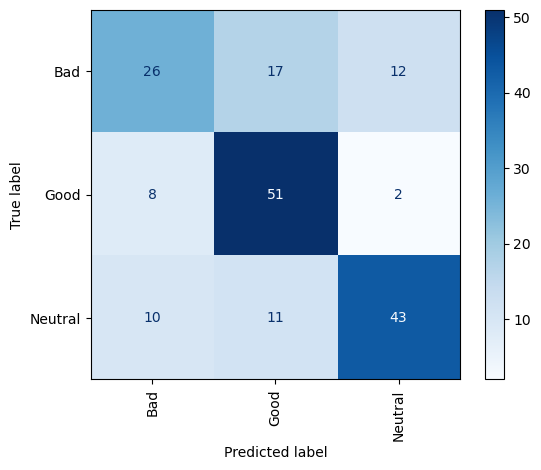

In [58]:
%matplotlib inline
from sklearn.metrics import ConfusionMatrixDisplay as cmd

cmd.from_estimator(model, x_test, y_test,
                   display_labels = ['Bad', 'Good','Neutral'],
                   cmap = 'Blues', xticks_rotation = 'vertical')

In [59]:
model.score(x_test, y_test)

0.6666666666666666

Use Scikit’s [RocCurveDisplay](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html) class to visualize the ROC curve.

In [60]:
model

MultinomialNB()

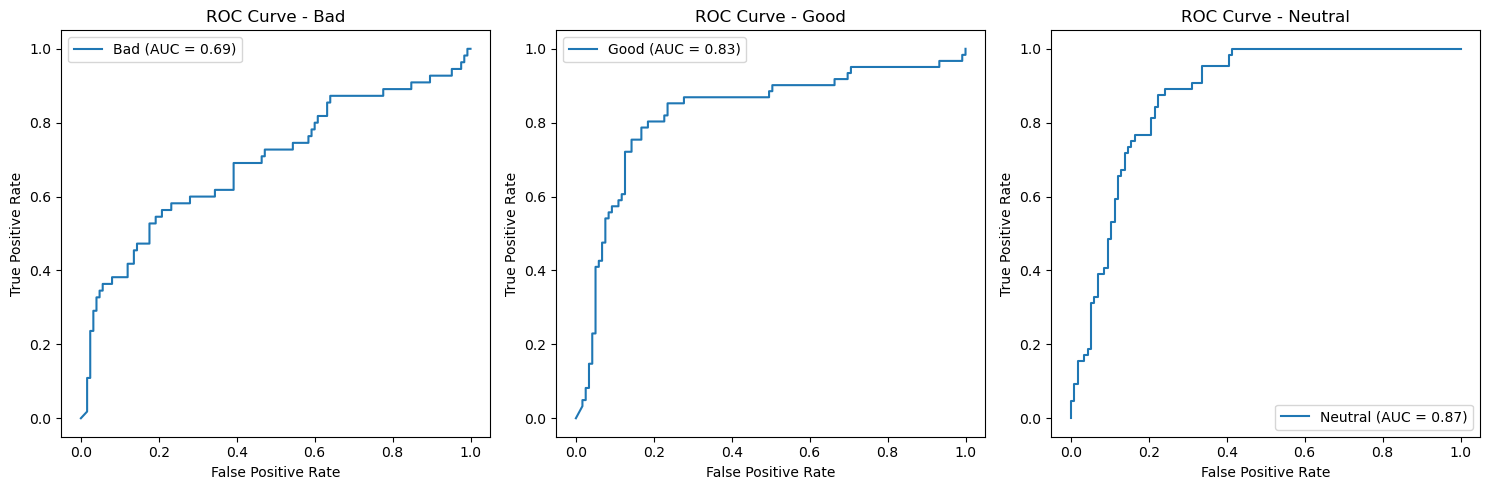

In [61]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming `model` is a trained classifier
# `X_test` is the test set features, and `y_test` is the true labels

# Get predicted probabilities for each class
y_score = model.predict_proba(x_test)

# Set num_classes to the total number of classes (3 in this case)
num_classes = 3

# Define class labels
class_labels = ['Bad', 'Good', 'Neutral']

# Plot ROC curves for each class
fig, axes = plt.subplots(nrows=1, ncols=num_classes, figsize=(15, 5))

for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_test == i, y_score[:, i])
    roc_auc = auc(fpr, tpr)
    
    axes[i].plot(fpr, tpr, label=f'{class_labels[i]} (AUC = {roc_auc:.2f})')
    axes[i].set_xlabel('False Positive Rate')
    axes[i].set_ylabel('True Positive Rate')
    axes[i].set_title(f'ROC Curve - {class_labels[i]}')
    axes[i].legend()

plt.tight_layout()
plt.show()


# Bad

In [164]:
msg = 'Bad and terrible experience, will not fly again with Ryanair'
input = vectorizer.transform([msg])
model.predict(input)[0]

0

In [165]:
msg = 'Dirty plane, poor experience overall'
input = vectorizer.transform([msg])
model.predict(input)[0]

0

# Good

In [166]:
msg = 'Amazing experience flying with Ryanair, I will recommend this company!!'
input = vectorizer.transform([msg])
model.predict(input)[0]

1

In [167]:
msg = 'Friendly staff, clean airplane and great snacks on board'
input = vectorizer.transform([msg])
model.predict(input)[0]

1

In [62]:
msg = 'Great company to fly with, I highly recommend it, good value for money'
input = vectorizer.transform([msg])
model.predict(input)[0]

1

# Neutral

In [171]:
msg = 'Budget company it gets you from point A to B'
input = vectorizer.transform([msg])
model.predict(input)[0]

2

In [172]:
msg = 'I am leaving a neutral review as Ryanair stands for: What you pay is what you get!!!'
input = vectorizer.transform([msg])
model.predict(input)[0]

2